In [1]:
x=1

In [2]:
import scanpy as sc
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
adata = sc.read('../../../pipeline/data/pp/totalvi_pbmc.h5ad')
adata

AnnData object with n_obs × n_vars = 647366 × 2000
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', '_scvi_labels', '_scvi_batch'
    var: 'feature_types', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'initial_clustering_colors', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_totalVI', 'X_umap', '_scvi_extra_categorical_covs', 'latent', 'protein_expression'
    l

In [4]:
adata.obs['Status_on_day_collection_summary'].cat.categories

Index(['Asymptomatic', 'Critical', 'Healthy', 'LPS_10hours', 'LPS_90mins',
       'Mild', 'Moderate', 'Non_covid', 'Severe'],
      dtype='object')

In [5]:
adata = adata[~adata.obs['Status_on_day_collection_summary'].isin(['Non_covid', 'LPS_10hours', 'LPS_90mins'])].copy()
adata

AnnData object with n_obs × n_vars = 624325 × 2000
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', '_scvi_labels', '_scvi_batch'
    var: 'feature_types', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'initial_clustering_colors', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_totalVI', 'X_umap', '_scvi_extra_categorical_covs', 'latent', 'protein_expression'
    l

In [6]:
adata.obs['Status_on_day_collection_summary'].value_counts()

Moderate        198632
Mild            135936
Healthy          97039
Critical         80852
Severe           78265
Asymptomatic     33601
Name: Status_on_day_collection_summary, dtype: int64

In [7]:
adata.obs[['Status_on_day_collection_summary', 'patient_id']].drop_duplicates().groupby('Status_on_day_collection_summary').agg('count')

,patient_id
Status_on_day_collection_summary,
Asymptomatic,9
Critical,15
Healthy,23
Mild,23
Moderate,30
Severe,13


In [8]:
n_samples = 13

In [9]:
healthy_samples = adata[adata.obs['Status_on_day_collection_summary'] == 'Healthy'].obs['patient_id'].drop_duplicates()
len(healthy_samples)

23

In [10]:
mild_samples = adata[adata.obs['Status_on_day_collection_summary'] == 'Mild'].obs['patient_id'].drop_duplicates()
len(mild_samples)

23

In [11]:
severe_samples = adata[adata.obs['Status_on_day_collection_summary'] == 'Severe'].obs['patient_id'].drop_duplicates()
len(severe_samples)

13

In [12]:
import random
random.seed(123)

In [13]:
healthy_samples_to_keep = random.sample(list(healthy_samples), n_samples)
mild_samples_to_keep = random.sample(list(mild_samples), n_samples)

In [14]:
samples_to_keep = list(severe_samples) + mild_samples_to_keep + list(healthy_samples)
len(samples_to_keep)

49

In [15]:
adata_subset = adata[adata.obs['patient_id'].isin(samples_to_keep)]
adata_subset

View of AnnData object with n_obs × n_vars = 256051 × 2000
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', '_scvi_labels', '_scvi_batch'
    var: 'feature_types', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'initial_clustering_colors', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_totalVI', 'X_umap', '_scvi_extra_categorical_covs', 'latent', 'protein_expressio

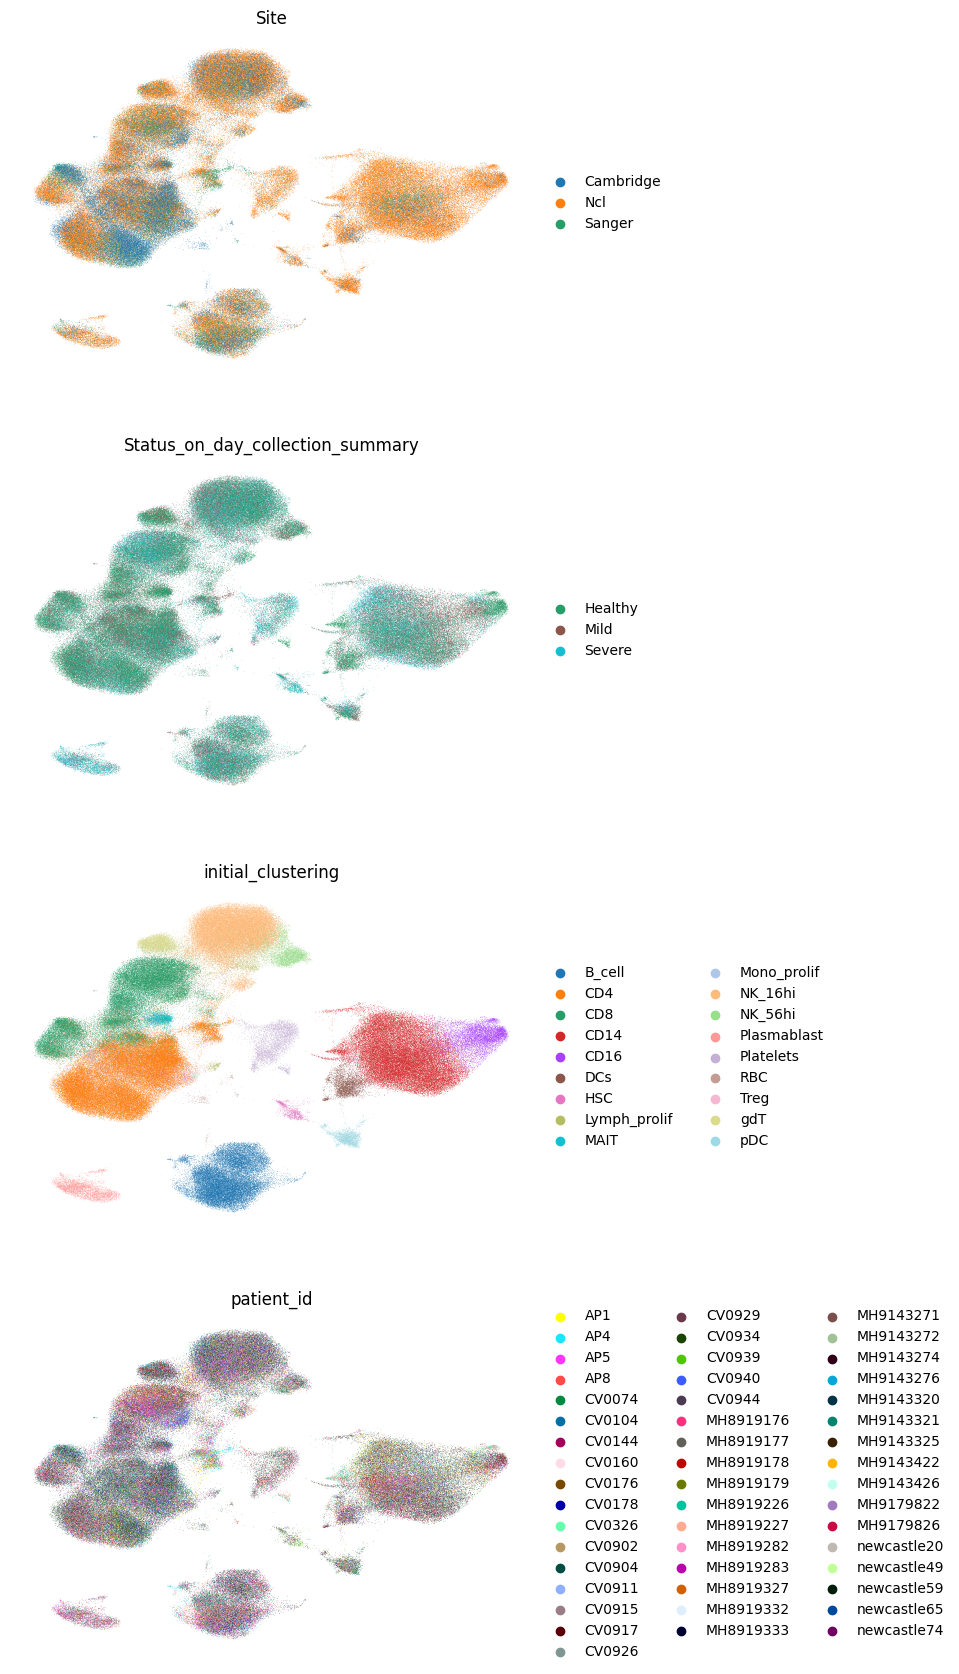

In [16]:
sc.pl.umap(adata_subset, color=['Site', 'Status_on_day_collection_summary', 'initial_clustering', 'patient_id'], ncols=1, frameon=False)

In [17]:
adata_subset.obs['Status_on_day_collection_summary'].value_counts()

Healthy    97039
Mild       80747
Severe     78265
Name: Status_on_day_collection_summary, dtype: int64

In [18]:
adata_subset

AnnData object with n_obs × n_vars = 256051 × 2000
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', '_scvi_labels', '_scvi_batch'
    var: 'feature_types', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'initial_clustering_colors', 'leiden', 'neighbors', 'pca', 'umap', 'patient_id_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_totalVI', 'X_umap', '_scvi_extra_categorical_covs', 'latent', 'prot

In [104]:
pd.DataFrame(adata_subset.obsm['X_totalVI']).index

RangeIndex(start=0, stop=256051, step=1)

In [107]:
embed_df = pd.DataFrame(adata_subset.obsm['X_totalVI'])
embed_df.index = adata_subset.obs_names
umap_df = pd.DataFrame(adata_subset.obsm['X_umap'])
umap_df.index = adata_subset.obs_names
umap_df.columns = [f'umap_{i}' for i in range(adata_subset.obsm['X_umap'].shape[1])]
df = adata_subset.obs.join(embed_df).join(umap_df)
df

,sample_id,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,full_clustering,initial_clustering,Resample,Collection_Day,...,12,13,14,15,16,17,18,19,umap_0,umap_1
covid_index,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGACCACGA-newcastle65,newcastle65,1351,1351,4278.0,178.0,4.160823,CD4.Naive,CD4,Initial,D0,...,-0.393295,0.030225,-0.149490,0.021478,1.271106,1.661969,-0.435684,0.411023,-5.984094,4.720072
AAACCTGAGATGTCGG-newcastle65,newcastle65,1921,1921,4740.0,127.0,2.679325,NK_16hi,NK_16hi,Initial,D0,...,0.012345,-0.893189,1.060939,-0.332505,0.042830,-0.087801,-0.305446,0.140721,1.366297,18.086613
AAACCTGAGGCGATAC-newcastle65,newcastle65,1056,1056,2875.0,198.0,6.886957,CD4.Naive,Treg,Initial,D0,...,-1.082319,-0.040121,-0.118372,0.673593,1.398275,0.255493,-1.106836,-0.118857,-4.329784,7.299045
AAACCTGAGTACACCT-newcastle65,newcastle65,2140,2140,5260.0,316.0,6.007605,NK_16hi,NK_16hi,Initial,D0,...,-0.356054,-1.195958,0.173701,0.395957,0.045601,-1.055710,-0.133051,-0.497084,2.536322,17.908323
AAACCTGAGTGAATTG-newcastle65,newcastle65,1620,1620,4043.0,232.0,5.738313,CD8.EM,CD4,Initial,D0,...,-1.421843,-0.301277,-0.186832,0.363450,0.763249,-1.010699,0.270473,-0.094663,0.017831,12.405646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BGCV15_TTTGGTTGTTGGGACA-1,BGCV15_CV0176,1631,1631,5325.0,184.0,3.455399,CD4.CM,CD4,Resample,D28,...,-0.778675,-0.644804,-1.080416,-1.097729,1.670607,0.311083,-0.261733,-0.139592,-1.666583,6.065211
BGCV15_TTTGGTTTCAAGATCC-1,BGCV15_CV0944,2503,2503,6681.0,264.0,3.951504,NK_16hi,NK_16hi,Initial,D0,...,0.680652,-1.791664,0.145996,-0.309551,-0.192087,-1.153287,-0.351154,0.301346,2.250423,19.199112
BGCV15_TTTGTCAAGGCGATAC-1,BGCV15_CV0176,2401,2401,8633.0,490.0,5.675895,CD4.CM,CD4,Resample,D28,...,0.328277,-0.429166,-0.410019,0.038053,0.726905,0.144504,-0.323815,0.433452,-3.997429,7.521034


In [63]:
freq_vector = adata[adata.obs['Status_on_day_collection_summary'] == 'Healthy'].obs['initial_clustering'].value_counts(normalize = True)
freq_vector

initial_clustering
CD4             0.291306
CD8             0.193695
NK_16hi         0.130257
CD14            0.106267
B_cell          0.077989
gdT             0.037016
CD16            0.035718
Treg            0.024114
NK_56hi         0.022898
Platelets       0.022105
DCs             0.021795
MAIT            0.020755
pDC             0.007100
RBC             0.003370
Lymph_prolif    0.002906
HSC             0.001484
Plasmablast     0.001185
Mono_prolif     0.000041
Name: proportion, dtype: float64

In [64]:
stratify_values = list(freq_vector.keys())
stratify_values

['CD4',
 'CD8',
 'NK_16hi',
 'CD14',
 'B_cell',
 'gdT',
 'CD16',
 'Treg',
 'NK_56hi',
 'Platelets',
 'DCs',
 'MAIT',
 'pDC',
 'RBC',
 'Lymph_prolif',
 'HSC',
 'Plasmablast',
 'Mono_prolif']

In [65]:
stratify_proportions = [freq_vector[name] for name in stratify_values]
stratify_proportions

[0.2913055575593318,
 0.19369531837714735,
 0.13025690701676645,
 0.10626655262317213,
 0.07798926204927915,
 0.037016045095270976,
 0.03571759807912283,
 0.024114016014179864,
 0.022898010078422078,
 0.02210451467966488,
 0.021795360628201033,
 0.020754541988272757,
 0.0071002380486196275,
 0.0033697791609559043,
 0.0029060480837601378,
 0.0014839394470264533,
 0.0011850905306114037,
 4.122054019517926e-05]

In [108]:
def stratify_data(df_data, stratify_column_name, stratify_values, stratify_proportions, random_state=None):
    """Stratifies data according to the values and proportions passed in
    Args:
        df_data (DataFrame): source data
        stratify_column_name (str): The name of the single column in the dataframe that holds the data values that will be used to stratify the data
        stratify_values (list of str): A list of all of the potential values for stratifying e.g. "Male, Graduate", "Male, Undergraduate", "Female, Graduate", "Female, Undergraduate"
        stratify_proportions (list of float): A list of numbers representing the desired propotions for stratifying e.g. 0.4, 0.4, 0.2, 0.2, The list values must add up to 1 and must match the number of values in stratify_values
        random_state (int, optional): sets the random_state. Defaults to None.
    Returns:
        DataFrame: a new dataframe based on df_data that has the new proportions represnting the desired strategy for stratifying
    """
    df_stratified = pd.DataFrame(columns = df_data.columns) # Create an empty DataFrame with column names matching df_data

    pos = -1
    for i in range(len(stratify_values)): # iterate over the stratify values (e.g. "Male, Undergraduate" etc.)
        pos += 1
        if pos == len(stratify_values) - 1: 
            ratio_len = len(df_data) - len(df_stratified) # if this is the final iteration make sure we calculate the number of values for the last set such that the return data has the same number of rows as the source data
        else:
            ratio_len = int(len(df_data) * stratify_proportions[i]) # Calculate the number of rows to match the desired proportion

        df_filtered = df_data[df_data[stratify_column_name] == stratify_values[i]] # Filter the source data based on the currently selected stratify value
        df_temp = df_filtered.sample(replace=True, n=ratio_len, random_state=random_state) # Sample the filtered data using the calculated ratio
        
        df_stratified = pd.concat([df_stratified, df_temp]) # Add the sampled / stratified datasets together to produce the final result
        
    return df_stratified # Return the stratified, re-sampled data   

In [109]:
df_final = []
for cond in adata_subset.obs['Status_on_day_collection_summary'].cat.categories:
    tmp = df[df['Status_on_day_collection_summary'] == cond].copy()
    tmp_stratified = stratify_data(tmp, 'initial_clustering', stratify_values, stratify_proportions, random_state=42)
    df_final.append(tmp_stratified)

In [110]:
df_final = pd.concat(df_final)

In [123]:
adata_subset_strat = sc.AnnData(df_final.drop(adata_subset.obs.columns, axis=1).drop(['umap_0', 'umap_1'], axis=1), obs = df_final[adata_subset.obs.columns])
adata_subset_strat.obsm['X_umap'] = df_final[['umap_0', 'umap_1']].values
adata_subset_strat.obs_names_make_unique()
adata_subset_strat

AnnData object with n_obs × n_vars = 256051 × 20
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', '_scvi_labels', '_scvi_batch'
    obsm: 'X_umap'

In [126]:
adata_subset_strat.obs['Status_on_day_collection_summary'].value_counts()

Status_on_day_collection_summary
Healthy    97039
Mild       80747
Severe     78265
Name: count, dtype: int64

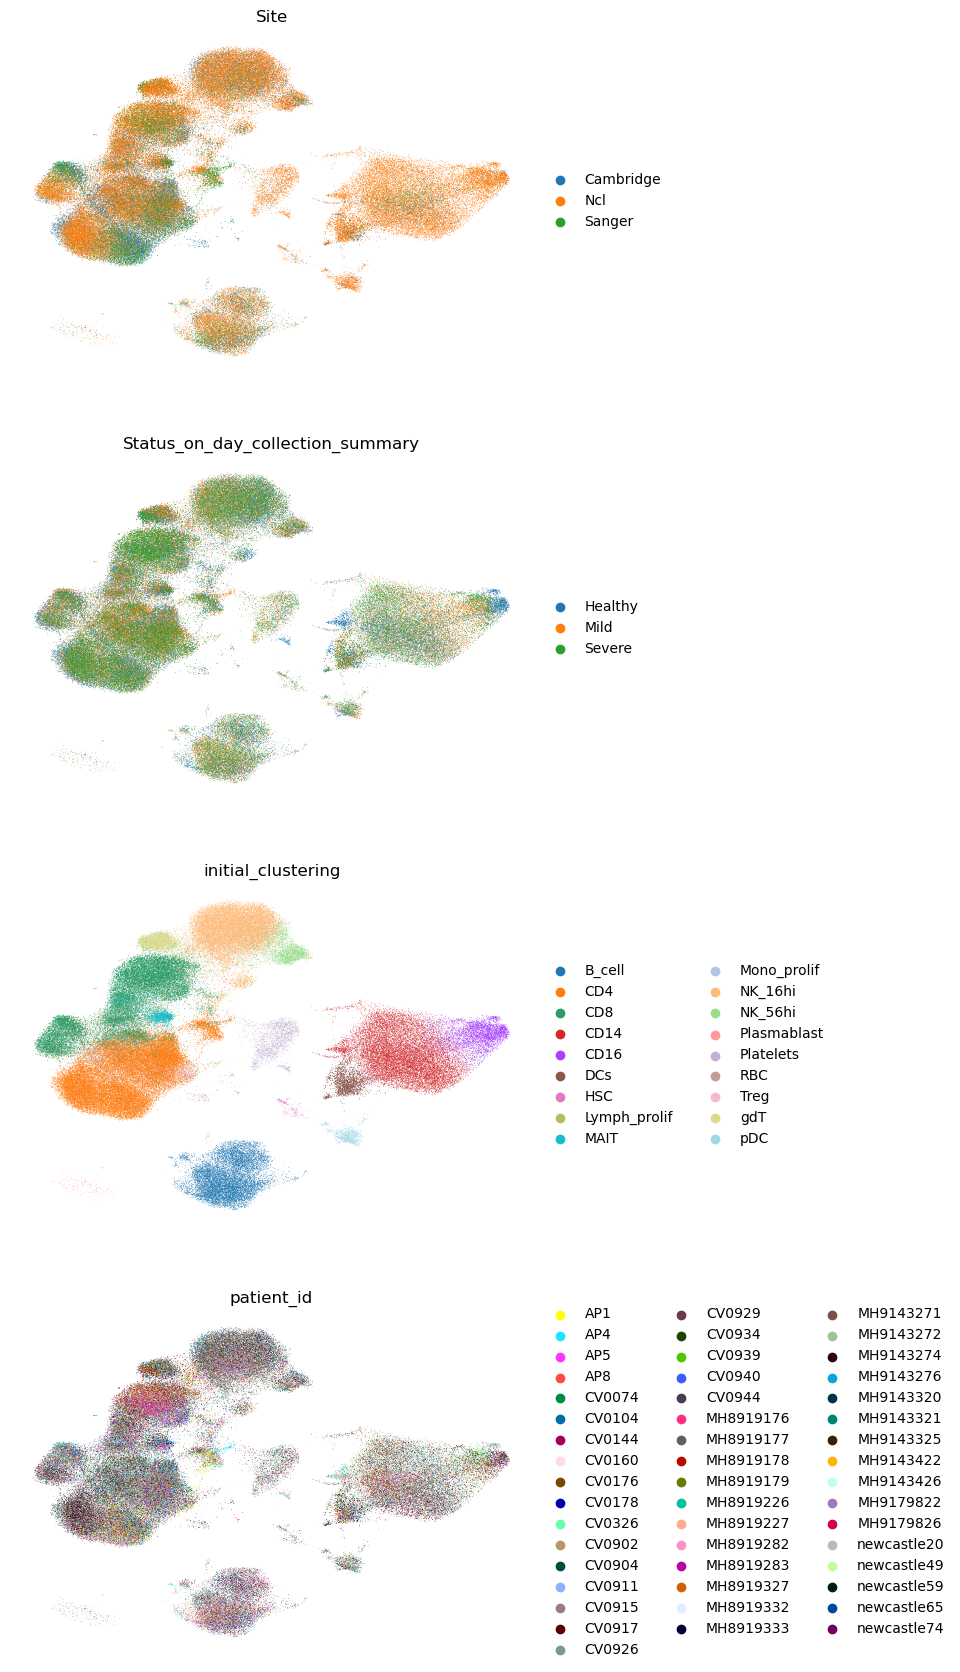

In [127]:
sc.pl.umap(adata_subset_strat, color=['Site', 'Status_on_day_collection_summary', 'initial_clustering', 'patient_id'], ncols=1, frameon=False)

In [128]:
adata_subset_strat[adata_subset_strat.obs['Status_on_day_collection_summary'] == 'Healthy'].obs['initial_clustering'].value_counts(normalize = True)

initial_clustering
CD4             0.291295
CD8             0.193695
NK_16hi         0.130257
CD14            0.106267
B_cell          0.077989
gdT             0.037016
CD16            0.035718
Treg            0.024114
NK_56hi         0.022898
Platelets       0.022105
DCs             0.021795
MAIT            0.020755
pDC             0.007100
RBC             0.003370
Lymph_prolif    0.002906
HSC             0.001484
Plasmablast     0.001185
Mono_prolif     0.000052
Name: proportion, dtype: float64

In [129]:
adata_subset_strat[adata_subset_strat.obs['Status_on_day_collection_summary'] == 'Mild'].obs['initial_clustering'].value_counts(normalize = True)

initial_clustering
CD4             0.291305
CD8             0.193691
NK_16hi         0.130246
CD14            0.106258
B_cell          0.077984
gdT             0.037004
CD16            0.035716
Treg            0.024112
NK_56hi         0.022886
Platelets       0.022094
DCs             0.021784
MAIT            0.020744
pDC             0.007096
RBC             0.003369
Lymph_prolif    0.002898
HSC             0.001474
Plasmablast     0.001177
Mono_prolif     0.000161
Name: proportion, dtype: float64

In [130]:
c[adata_subset_strat.obs['Status_on_day_collection_summary'] == 'Severe'].obs['initial_clustering'].value_counts(normalize = True)

initial_clustering
CD4             0.291305
CD8             0.193688
NK_16hi         0.130250
CD14            0.106254
B_cell          0.077979
gdT             0.037015
CD16            0.035712
Treg            0.024110
NK_56hi         0.022897
Platelets       0.022104
DCs             0.021785
MAIT            0.020750
pDC             0.007091
RBC             0.003360
Lymph_prolif    0.002900
HSC             0.001482
Plasmablast     0.001175
Mono_prolif     0.000141
Name: proportion, dtype: float64

In [134]:
adata_subset_strat = adata_subset_strat.copy()
adata_subset_strat

AnnData object with n_obs × n_vars = 256051 × 20
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', '_scvi_labels', '_scvi_batch'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', 'initial_clustering_colors', 'patient_id_colors'
    obsm: 'X_umap'

In [135]:
del adata_subset_strat.obs['n_genes']
del adata_subset_strat.obs['n_genes_by_counts']
del adata_subset_strat.obs['_scvi_labels']
del adata_subset_strat.obs['_scvi_batch']

In [136]:
adata_subset_strat.write('../../../pipeline/data/pp/totalvi_pbmc_embed_3cond_balanced_strat.h5ad')

In [19]:
tmp = sc.AnnData(adata_subset.obsm['X_totalVI'])
tmp.obs = adata_subset.obs
tmp.obsm['X_umap'] = adata_subset.obsm['X_umap']
tmp

AnnData object with n_obs × n_vars = 256051 × 20
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', '_scvi_labels', '_scvi_batch'
    obsm: 'X_umap'

In [20]:
tmp.write('../../../pipeline/data/pp/totalvi_pbmc_embed_3cond_balanced.h5ad')